Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load the Data

In [2]:
# Load the dataset
data = pd.read_csv('Customers.csv')

# Display the first few rows of the dataset
print(data.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


Data Overview


Data Preprocessing

In [3]:
# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [4]:
# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [5]:
# Convert SignupDate to datetime format
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# Extract year and month from SignupDate for further analysis
data['SignupYear'] = data['SignupDate'].dt.year
data['SignupMonth'] = data['SignupDate'].dt.month

Exploratory Data Analysis

<ipython-input-6-c8e52b4b8882>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Region', palette='viridis')


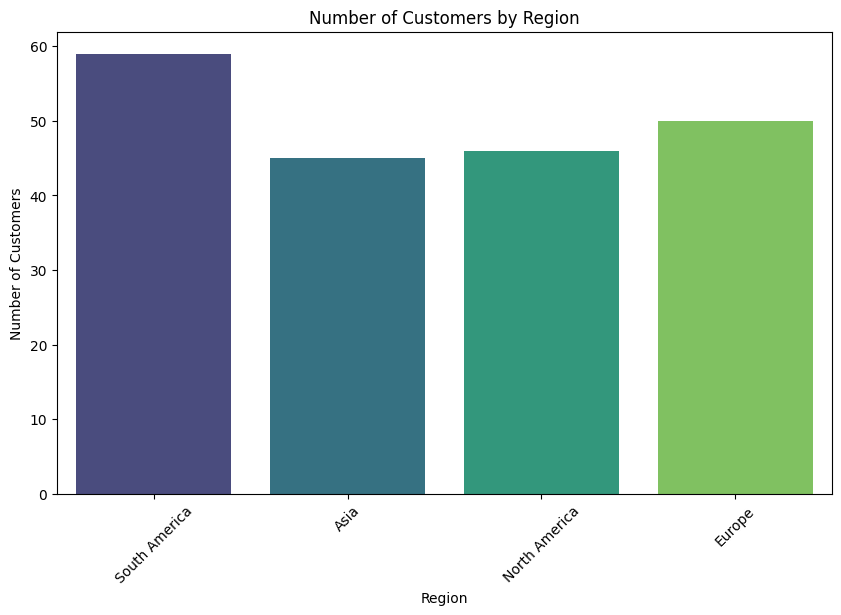

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Customers Over Time

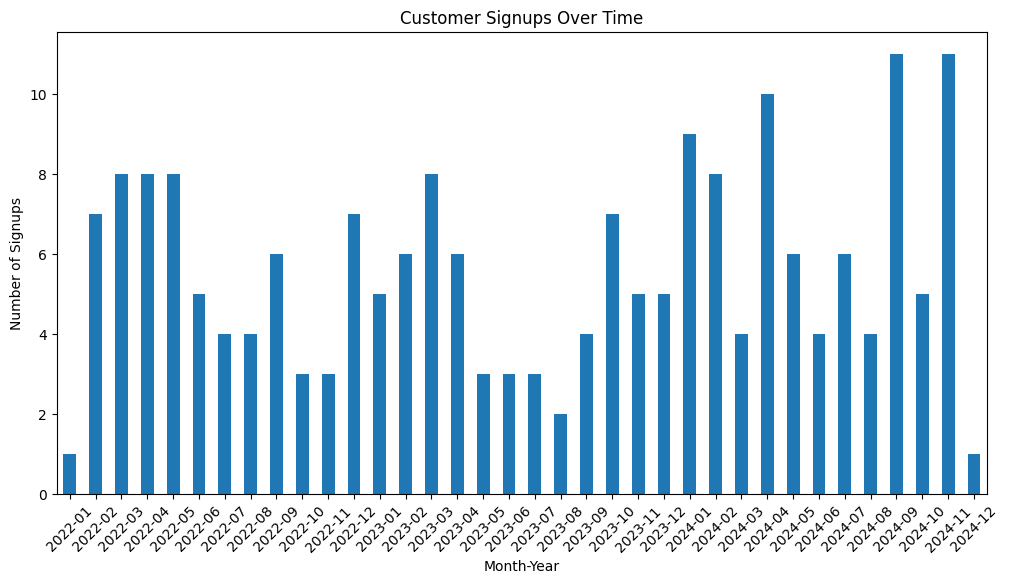

In [7]:
plt.figure(figsize=(12, 6))
data['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Customer Signups Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

Customers by Signup Year

<ipython-input-8-1de7d37a130e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='SignupYear', palette='coolwarm')


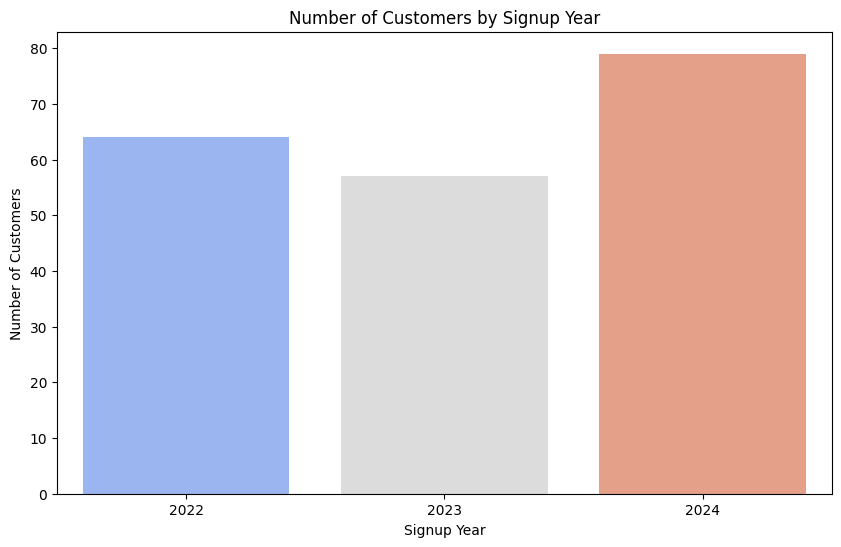

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SignupYear', palette='coolwarm')
plt.title('Number of Customers by Signup Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()

Signup Trends by Region


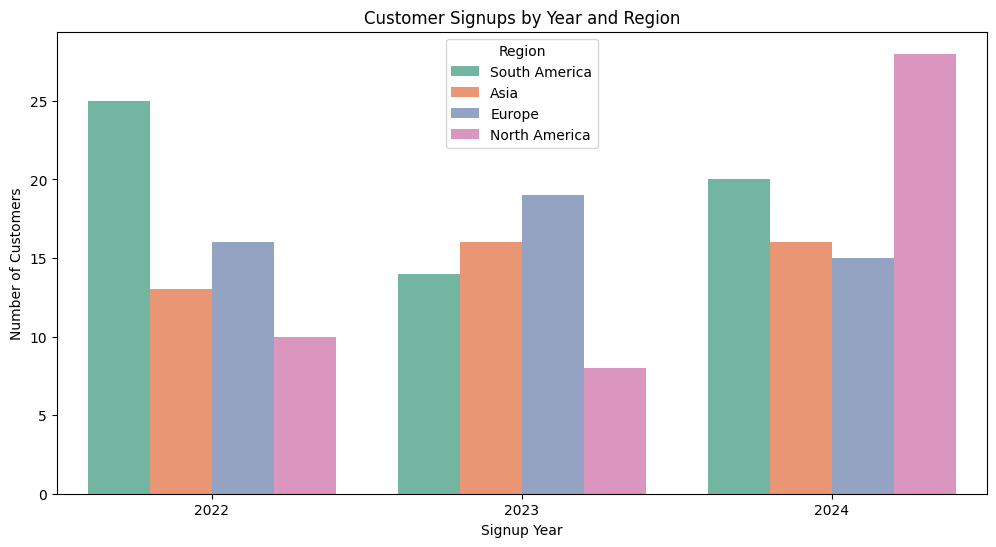

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='SignupYear', hue='Region', palette='Set2')
plt.title('Customer Signups by Year and Region')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.show()

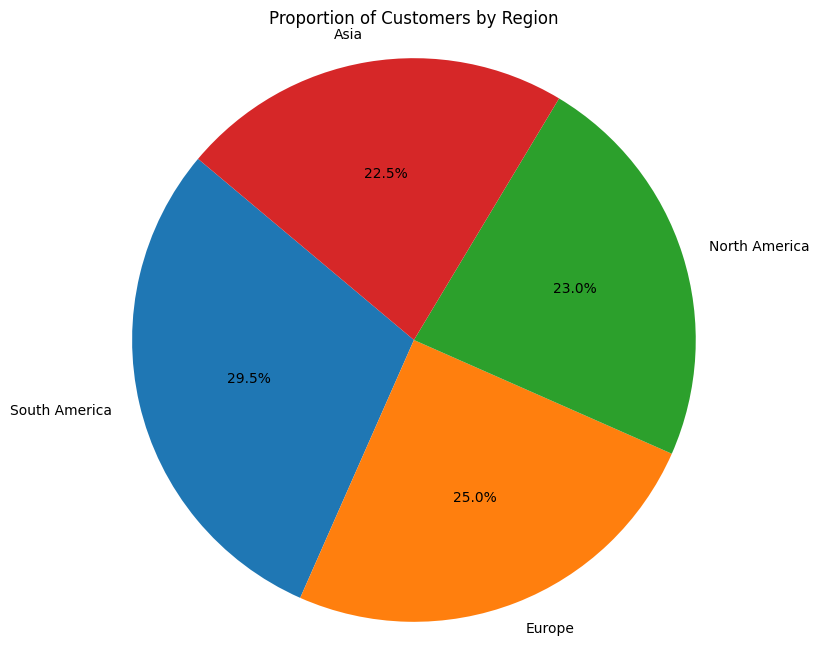

In [10]:
# 1. Pie Chart of Customers by Region
plt.figure(figsize=(8, 8))
region_counts = data['Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-12-a0886d74dfee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_month_counts.index, y=signup_month_counts.values, palette='viridis')


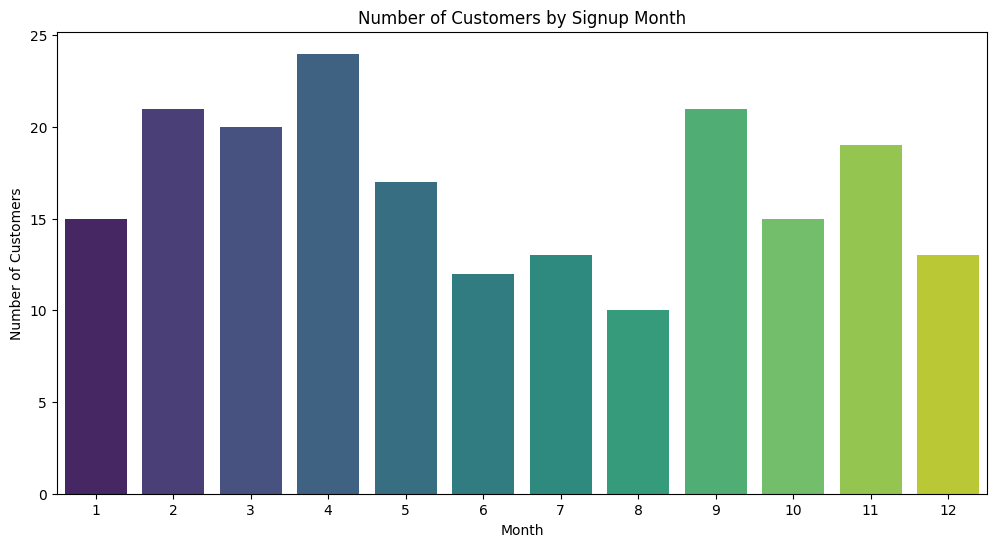

In [12]:
# 2. Bar Plot of Customers by Signup Month
plt.figure(figsize=(12, 6))
signup_month_counts = data['SignupMonth'].value_counts().sort_index()
sns.barplot(x=signup_month_counts.index, y=signup_month_counts.values, palette='viridis')
plt.title('Number of Customers by Signup Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()

NameError: name 'np' is not defined

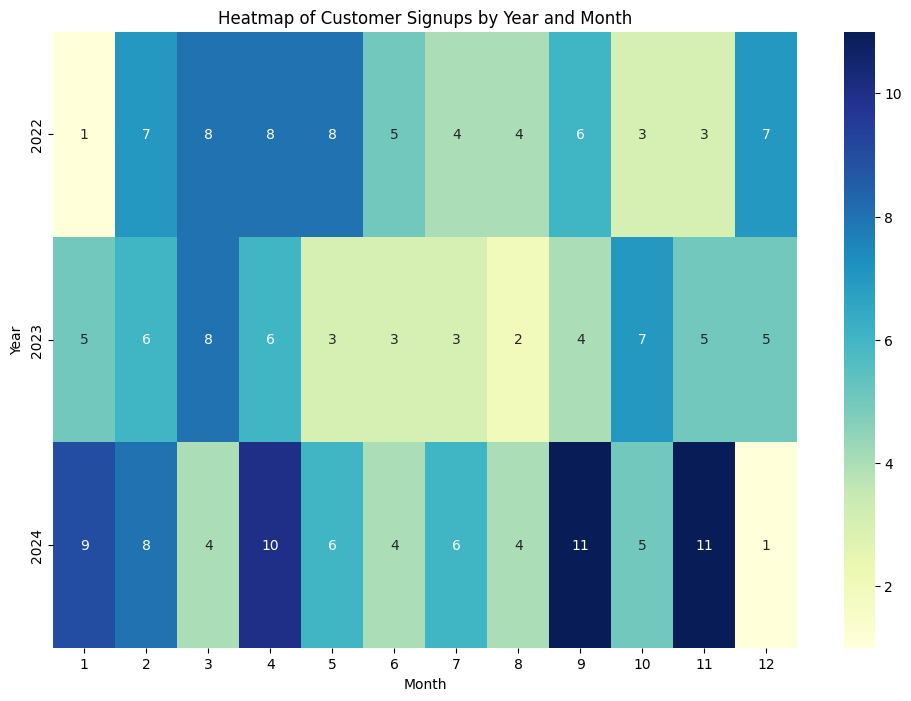

In [13]:
# 3. Heatmap of Customer Signups by Year and Month
signup_counts = data.groupby(['SignupYear', 'SignupMonth']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(signup_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Customer Signups by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=np.arange(12) + 0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<ipython-input-14-a2b58b17c844>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='SignupYear', y='SignupDate', palette='Set2')


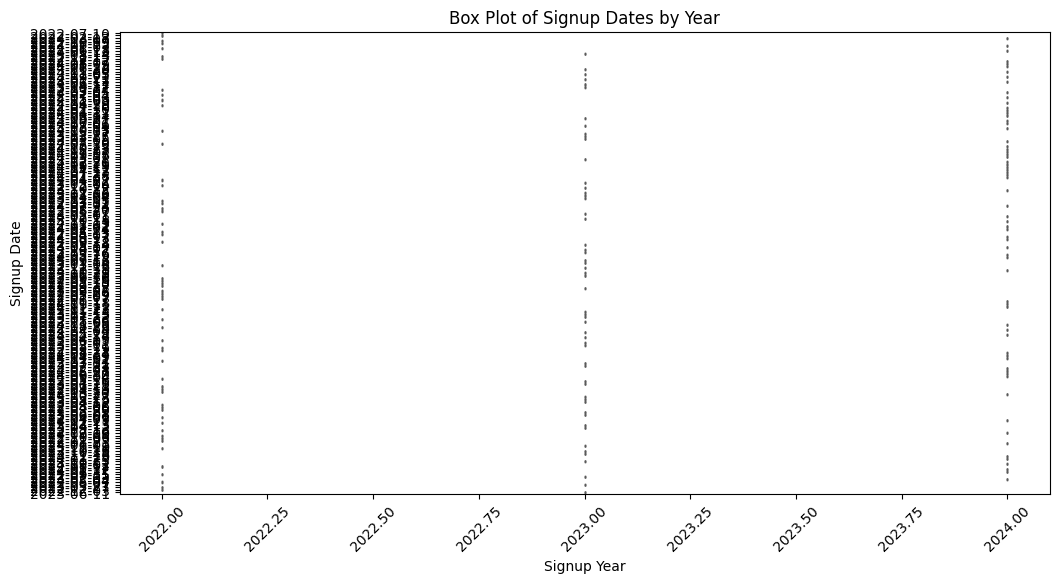

In [14]:
# 4. Box Plot of Signup Dates
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='SignupYear', y='SignupDate', palette='Set2')
plt.title('Box Plot of Signup Dates by Year')
plt.xlabel('Signup Year')
plt.ylabel('Signup Date')
plt.xticks(rotation=45)
plt.show()

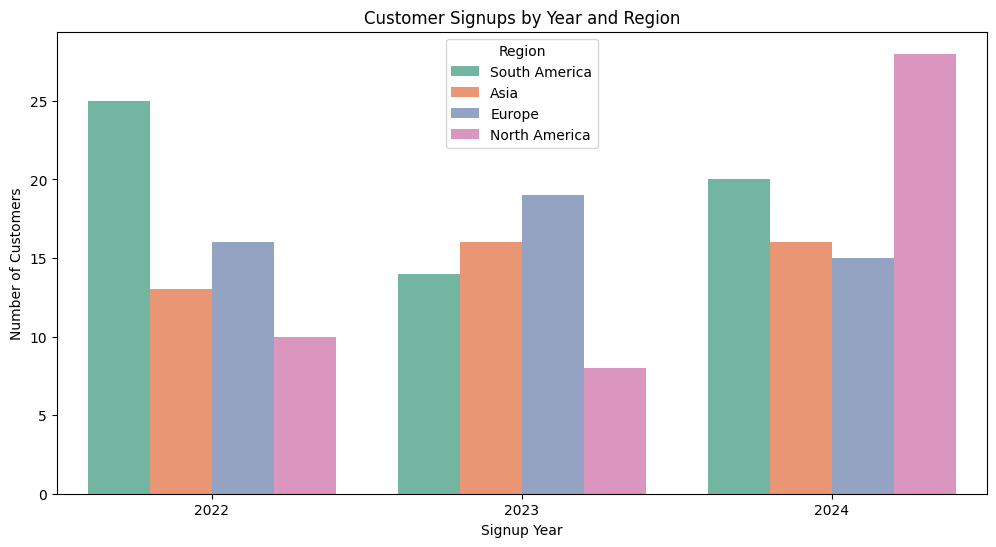

In [15]:
# 5. Count Plot of Customers by Region and Year
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='SignupYear', hue='Region', palette='Set2')
plt.title('Customer Signups by Year and Region')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.show()